In [81]:
import string
import re
import codecs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import glob

In [82]:
#To merge data files into one text file
# read_files = glob.glob("train\English\*")

# with open("english.txt", "wb") as outfile:
#     for f in read_files:
#         with open(f, "rb") as infile:
#             outfile.write(infile.read())

In [83]:
# #to remove html tags
# infile = "english.txt"
# outfile = "train/train/english.txt"
 
# fin = open(infile,encoding="utf8")
# fout = open(outfile, "w+", encoding="utf8")

# for line in fin:
#     line = re.sub(r"<[^>]+>","",line)
#     fout.write(line)
# fin.close()
# fout.close()

In [84]:
#Loading English Data
eng_df = pd.read_csv("train/English.txt","utf-8",header=None,engine ='python', names=["English"])
eng_df.head()

,English
0,"Tweet text: Putin, on not being included in th..."
1,Video transcription:
2,Audience member: Practically all of the countr...
3,"Putin: (laughing) Listen, itâ€™s offensive!"
4,Several members of the Russian Duma (Assembly)...


In [85]:
#Loading German Data
ger_df =pd.read_csv("train/German.txt","utf-8",header=None,engine ='python', names=["German"])
ger_df.head()

,German
0,"ZÃ¤hlt es, wenn ich auf den Strand gehe und ei..."
1,Andere geben das Manifest 'Pfeif auf die Troik...
2,Wenn sie uns verbiegen und uns dazu zwingen wo...
3,Dieser Bericht ist Teil unseres Dossiers Ã¼ber...
4,https://de.globalvoices.org/2012/09/17/pakista...


In [86]:
#Loading French Data
fre_df =pd.read_csv("train/French.txt","utf-8",header=None,engine ='python', names=["French"])
fre_df.head()

,French
0,"Ana Frenkel, membre de la communautÃ© juive de..."
1,"Il les a organisÃ©, il allait de maison en mai..."
2,Le blogueur Velimir Mladenovic a citÃ© sur son...
3,Voici ci-dessous des commentaires sous le bill...
4,Sesili dit :


In [87]:
#Loading Spanish Data
spa_df =pd.read_csv("train/Spanish.txt","utf-8",header=None,engine ='python', names=["Spanish"])
spa_df.head()

,Spanish
0,El periodista marroquÃ­ Hamid El Mahdoui inici...
1,Nueva herramienta que busca reducir abuso en l...
2,"A mediados de septiembre, un grupo de programa..."
3,Nuevas investigaciones
4,"Uso de los medios en el Medio Oriente, 2017 - ..."


In [88]:
#Loading Chinese Data
chi_df =pd.read_csv("train/chinese.txt","utf-8",header=None,engine ='python', names=["Chinese"])
chi_df.head()

,Chinese
0,ã€ŒDa Da Dingï¼šå…¶ä»–å¥³æ€§ä»¬ã€�
1,æˆ�åŠŸçš„å¥³è¿�åŠ¨å‘˜ä»¬å¹¶é�žæ˜¯åœ¨å�°åº¦å”¯ä...
2,åœ¨å†™è¿™åˆ™æ–‡ç« æ—¶ï¼Œè¿™æ®µå½±ç‰‡çš„ç‚¹é˜…ä...
3,å�¦ä¸€ç¾¤å�°åº¦å¥³æ€§åœ¨å½±ç‰‡ä¸­è¢«æ��ç»˜å‡ºæ...
4,ä¸€äº›æŽ¨ç‰¹ç”¨æˆ·å…´å¥‹åœ°å¯¹è¯¥æ�¶æ�žå½±ç‰‡è...


In [89]:
for char in string.punctuation:
    print(char,end=" ")
translate_table =dict((ord(char),None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [90]:
for i,line in eng_df.iterrows():
    line = line['English']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+","",line)
        line = line.translate(translate_table)
        data_eng.append(line)
        lang_eng.append("English")

In [91]:
for i,line in ger_df.iterrows():
    line = line['German']
    if len(line) !=0:
        line = line.lower()
        line =re.sub(r"\d+","",line)
        line = line.translate(translate_table)
        data_ger.append(line)
        lang_ger.append("German")

In [92]:
for i,line in fre_df.iterrows():
    line = line['French']
    if len(line) !=0:
        line = line.lower()
        line =re.sub(r"\d+","",line)
        line = line.translate(translate_table)
        data_fre.append(line)
        lang_fre.append("French")

In [93]:
for i,line in spa_df.iterrows():
    line = line['Spanish']
    if len(line) !=0:
        line = line.lower()
        line =re.sub(r"\d+","",line)
        line = line.translate(translate_table)
        data_spa.append(line)
        lang_spa.append("Spanish")

In [94]:
for i,line in chi_df.iterrows():
    line = line['Chinese']
    if len(line) !=0:
        line = line.lower()
        line =re.sub(r"\d+","",line)
        line = re.sub(r"[a-zA-Z]+","", line)
        line = line.translate(translate_table)
        data_chi.append(line)
        lang_chi.append("Chinese (Traditional)")

In [113]:
df = pd.DataFrame({"Text":data_eng+data_fre+data_ger+data_spa+data_chi, "language":lang_eng+lang_fre+lang_ger+lang_spa+lang_chi})
print(df.shape)

(382935, 2)


In [114]:
X, y=df.iloc[:,0],df.iloc[:,1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(306348,)
(76587,)
(306348,)
(76587,)


In [115]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3),analyzer='char')
pipe_lr_r13=pipeline.Pipeline([('vectorizer',vectorizer),('clf',linear_model.LogisticRegression(max_iter=5000))])
pipe_lr_r13.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression(max_iter=5000))])

In [116]:
y_predicted=pipe_lr_r13.predict(X_test)
acc=(metrics.accuracy_score(y_test, y_predicted))*100
print(acc,'%')

98.55327927716192 %


In [117]:
matrix=metrics.confusion_matrix(y_test, y_predicted)
languages=set(y_train)
cm_df=pd.DataFrame(matrix,languages,languages)
print('Confusion Matrix : \n', matrix)

Confusion Matrix : 
 [[ 6567     0     3     0     2]
 [   15 17125    32     6   149]
 [   42   123 20660     9    69]
 [   11    97    39  7388    37]
 [  236   203    28     7 23739]]


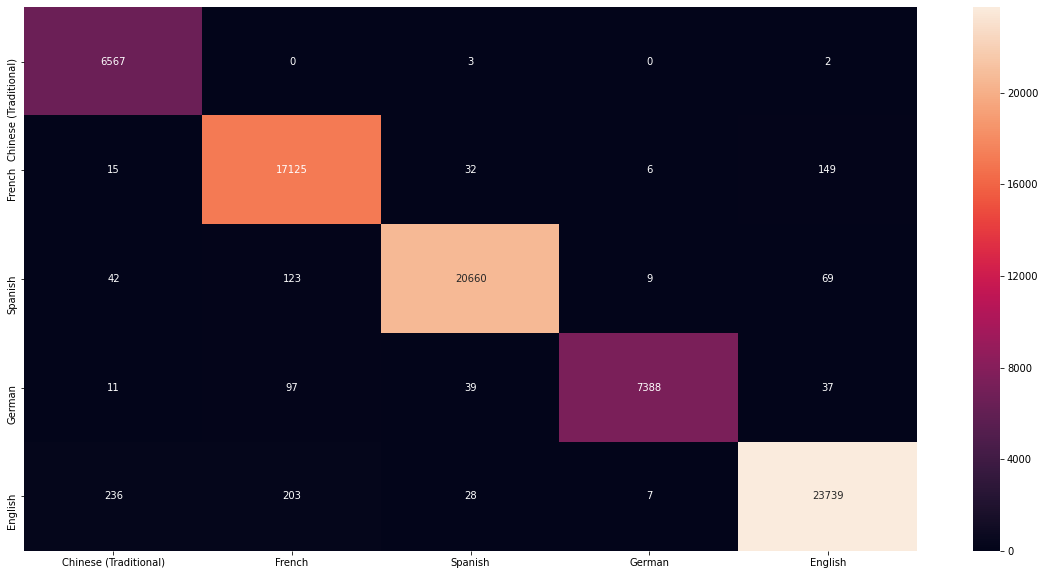

In [118]:
plt.figure(figsize=(20,10))  
sns.heatmap(cm_df, annot=True,fmt='d')

In [119]:
import pickle
#persisit model so that it can be used by different consumers
lrFile =open('LRModel.pckl', 'wb')
pickle.dump(pipe_lr_r13, lrFile)
lrFile.close()

In [120]:
global lrLangDetectModel
lrLangDetectFile =open('LRModel.pckl','rb')
lrLangDetectModel = pickle.load(lrLangDetectFile)
lrLangDetectFile.close()

In [121]:
def lang_detect(text):
    import numpy as np
    import string
    import re
    import pickle
    translate_table=dict((ord(char), None) for char in string.punctuation)
    
    global lrLangDetectModel
    lrLangDetectFile =open('LRModel.pckl','rb')
    lrLangDetectModel = pickle.load(lrLangDetectFile)
    lrLangDetectFile.close()
    
    text=" ".join(text.split())
    text=text.lower()
    text =re.sub(r"\d+","",text)
    text=text.translate(translate_table)
    pred =lrLangDetectModel.predict([text])
    prob = lrLangDetectModel.predict_proba([text])
    return pred[0]
    

In [122]:
lang_detect("I am a boy")

'English'

In [123]:
lang_detect("Bonjour")

'French'

In [124]:
lang_detect("una casa pequeña")

'Spanish'

In [125]:
lang_detect("Pfeif auf die Troika")

'German'

In [126]:
lang_detect("成功的女运动员们并非是在印")

'Chinese (Traditional)'